# Post processing of mumax3 output data

In [1]:
#prevents pop-ups
%matplotlib inline 
import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
from detecta import detect_peaks
from scipy.signal import argrelextrema
from ipywidgets import interactive
import seaborn as sb
import scipy as sp

 <a id='helperfunctions'></a>
## mumax3 helper functions

In [2]:
def read_mumax3_table(filename):
    """Puts the mumax3 output table in a pandas dataframe"""

    from pandas import read_table
    
    table = read_table(filename)
    table.columns = ' '.join(table.columns).split()[1::2]
    
    return table

Mumax3 does not only write output data in a table, it can also write field data to ovf files. The function below converts all ovf files in the output directory to numpy files. These files are then loaded using the numpy.load function. The result is a python dictionary of the field data (a numpy array) with the ovf filename as key.

In [3]:
def read_mumax3_ovffiles(outputdir):
    """Load all ovffiles in outputdir into a dictionary of numpy arrays 
    with the ovffilename (without extension) as key"""
    
    from subprocess import run, PIPE, STDOUT
    from glob import glob
    from os import path
    from numpy import load

    # convert all ovf files in the output directory to numpy files
    p = run(["mumax3-convert","-numpy",outputdir+"/*.ovf"], stdout=PIPE, stderr=STDOUT)
    if p.returncode != 0:
        print(p.stdout.decode('UTF-8'))

    # read the numpy files (the converted ovf files)
    fields = {}
    for npyfile in glob(outputdir+"/*.npy"):
        key = path.splitext(path.basename(npyfile))[0]
        fields[key] = load(npyfile)
    
    return fields

The function below executes a mumax3 script and returns the data of the output table in a pandas dataframe, and the saved fields as numpy arrays.

In [4]:
def run_mumax3(script, name, verbose=False):
    """ Executes a mumax3 script and convert ovf files to numpy files
    
    Parameters
    ----------
      script:  string containing the mumax3 input script
      name:    name of the simulation (this will be the name of the script and output dir)
      verbose: print stdout of mumax3 when it is finished
    """
    
    from subprocess import run, PIPE, STDOUT
    from os import path

    scriptfile = name + ".txt" 
    outputdir  = name + ".out"

    # write the input script in scriptfile
    with open(scriptfile, 'w' ) as f:
        f.write(script)
    
    # call mumax3 to execute this script
    p = run(["mumax3","-f",scriptfile], stdout=PIPE, stderr=STDOUT)
    if verbose or p.returncode != 0:
        print(p.stdout.decode('UTF-8'))
        
    if path.exists(outputdir + "/table.txt"):
        table = read_mumax3_table(outputdir + "/table.txt")
    else:
        table = None
        
    fields = read_mumax3_ovffiles(outputdir)
    
    return table, fields

## Read the ovf files and plot mz vs. x  and skyrmion radius heatmap

In [5]:
def read_ovf_out(name):
    #outputdir  = name + ".out"
    outputdir  = name 
    table = read_mumax3_table(outputdir + "/table.txt")
    fields = read_mumax3_ovffiles(outputdir)
    
    return table, fields

In [6]:
from scipy.signal import find_peaks_cwt
def plotpeaks(mz,A,B,N1,N2):
    fig, ax = plt.subplots()
    ax.ticklabel_format(axis='x', style = 'sci', scilimits=(-9,-9))
    x = cx*np.arange(len(mz))
    peaks, _ = find_peaks(mz.flatten(), width = (5,None))
    #peaks = find_peaks_cwt(mz.flatten(), widths=np.ones(mz.shape[0])*2)-1
    #peaks = argrelextrema(mz, np.greater)
    #peaks = detect_peaks(mz.flatten())
    plt.plot(x,mz)
    plt.grid()
    plt.plot(peaks*cx, mz[peaks], "x")
    plt.title(N1+'='+str(A)+' '+N2+'='+str(B))
    plt.ylabel('mz')
    plt.xlabel('nx(m)')
    return peaks

# a- Ms and Ku sweeps

at MsKu_sweeps_p5/Ms_00/Ku_-8.5e+07.out no skyrmion
at MsKu_sweeps_p5/Ms_00/Ku_-8.5e+06.out no skyrmion
at MsKu_sweeps_p5/Ms_00/Ku_-85000.out no skyrmion
at MsKu_sweeps_p5/Ms_00/Ku_-8500.out no skyrmion
at MsKu_sweeps_p5/Ms_00/Ku_8500.out no skyrmion
at MsKu_sweeps_p5/Ms_00/Ku_85000.out no skyrmion
at MsKu_sweeps_p5/Ms_00/Ku_850000.out no skyrmion
at MsKu_sweeps_p5/Ms_00/Ku_8.5e+06.out no skyrmion
at MsKu_sweeps_p5/Ms_00/Ku_8.5e+07.out no skyrmion
at MsKu_sweeps_p5/Ms_09/Ku_-8.5e+07.out no skyrmion
at MsKu_sweeps_p5/Ms_09/Ku_-85000.out no skyrmion
at MsKu_sweeps_p5/Ms_09/Ku_-8500.out no skyrmion
at MsKu_sweeps_p5/Ms_09/Ku_8500.out no skyrmion
at MsKu_sweeps_p5/Ms_09/Ku_85000.out no skyrmion
at MsKu_sweeps_p5/Ms_09/Ku_850000.out no skyrmion
at MsKu_sweeps_p5/Ms_09/Ku_8.5e+06.out no skyrmion
at MsKu_sweeps_p5/Ms_09/Ku_8.5e+07.out no skyrmion


C:\Users\tha-b\AppData\Local\Temp\ipykernel_5364\3700807676.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


at MsKu_sweeps_p5/Ms_95/Ku_-8.5e+06.out no skyrmion
at MsKu_sweeps_p5/Ms_95/Ku_-85000.out no skyrmion
at MsKu_sweeps_p5/Ms_95/Ku_-8500.out no skyrmion
at MsKu_sweeps_p5/Ms_95/Ku_8500.out no skyrmion
at MsKu_sweeps_p5/Ms_95/Ku_85000.out no skyrmion
at MsKu_sweeps_p5/Ms_95/Ku_850000.out no skyrmion
at MsKu_sweeps_p5/Ms_95/Ku_8.5e+06.out no skyrmion
at MsKu_sweeps_p5/Ms_95/Ku_8.5e+07.out no skyrmion
at MsKu_sweeps_p5/Ms_9550/Ku_-85000.out no skyrmion
at MsKu_sweeps_p5/Ms_9550/Ku_-8500.out no skyrmion
at MsKu_sweeps_p5/Ms_9550/Ku_8500.out no skyrmion
at MsKu_sweeps_p5/Ms_9550/Ku_85000.out no skyrmion
at MsKu_sweeps_p5/Ms_9550/Ku_850000.out no skyrmion
at MsKu_sweeps_p5/Ms_9550/Ku_8.5e+06.out no skyrmion
at MsKu_sweeps_p5/Ms_95500/Ku_-8.5e+07.out no skyrmion
at MsKu_sweeps_p5/Ms_95500/Ku_-8.5e+06.out no skyrmion
at MsKu_sweeps_p5/Ms_95500/Ku_-850000.out no skyrmion
at MsKu_sweeps_p5/Ms_95500/Ku_-85000.out no skyrmion
at MsKu_sweeps_p5/Ms_95500/Ku_-8500.out no skyrmion
at MsKu_sweeps_p5/Ms_9

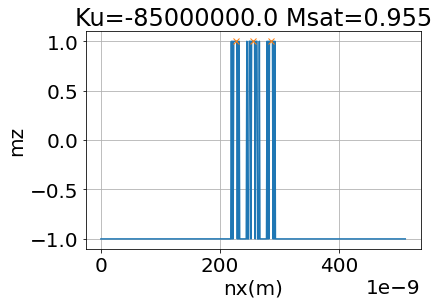

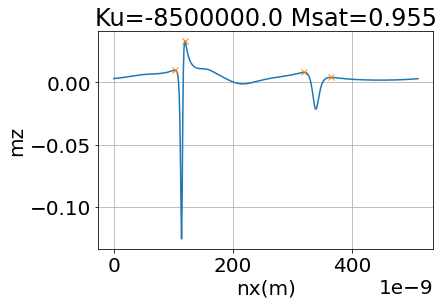

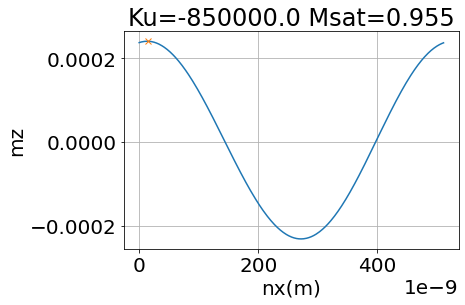

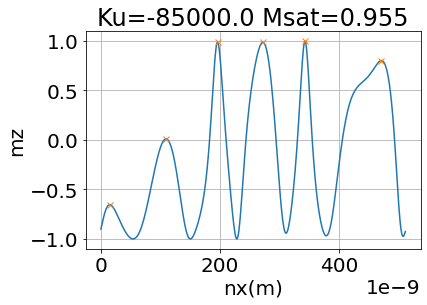

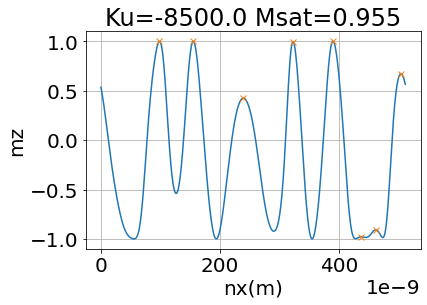

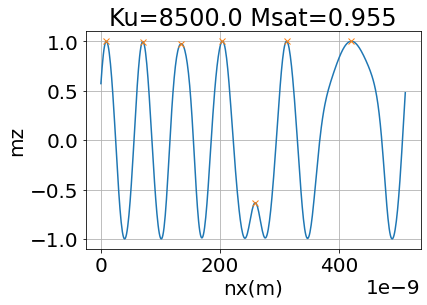

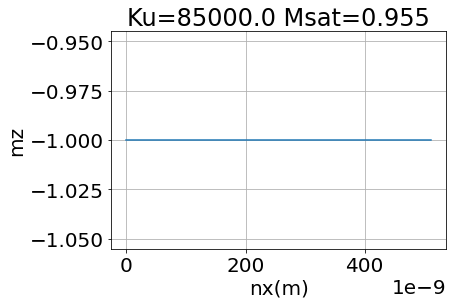

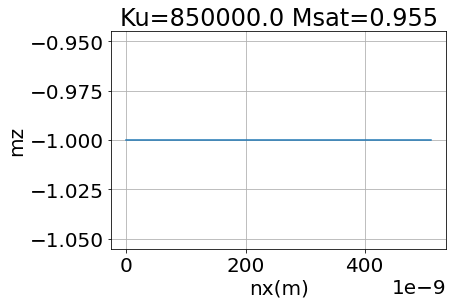

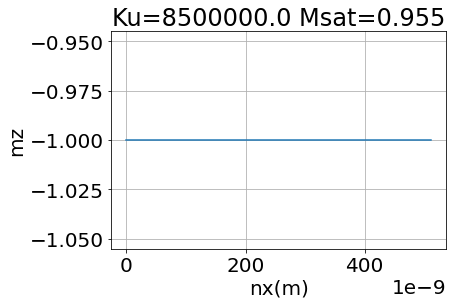

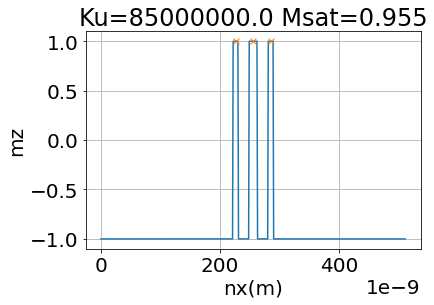

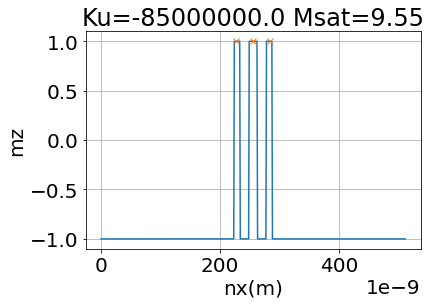

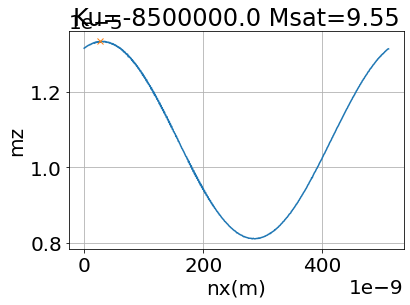

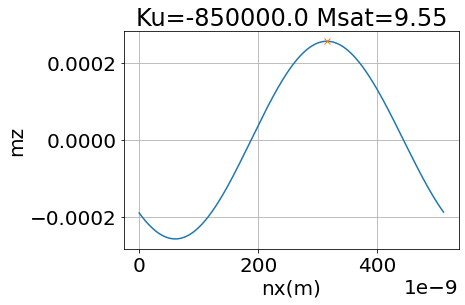

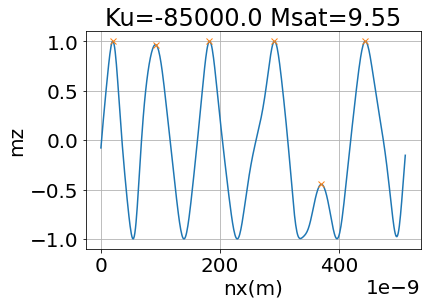

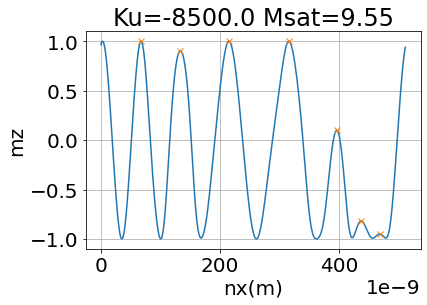

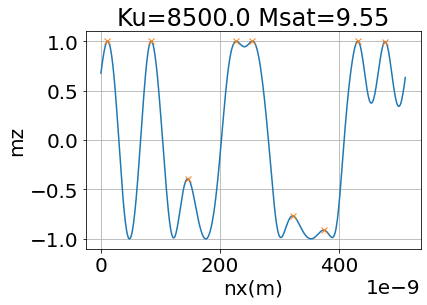

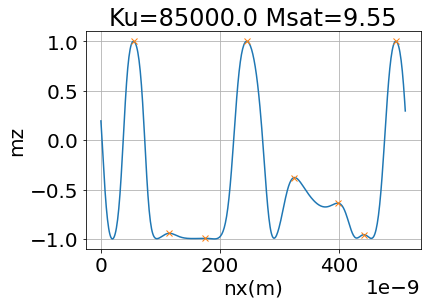

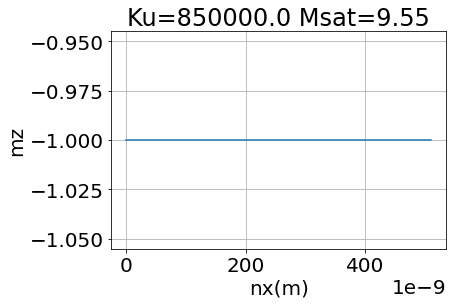

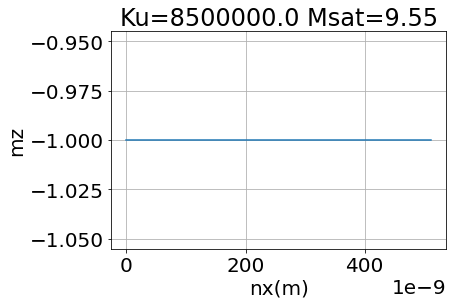

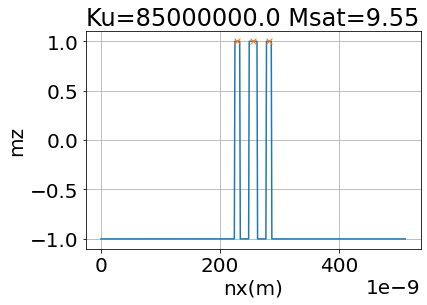

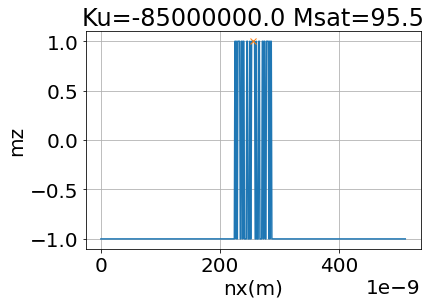

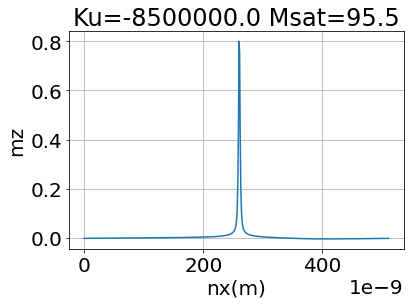

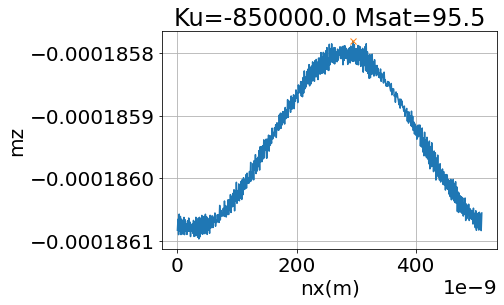

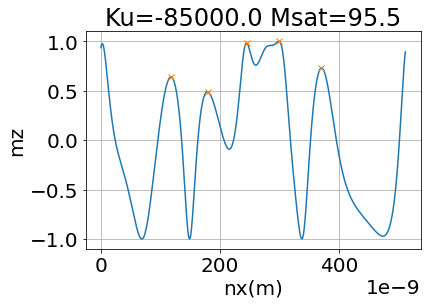

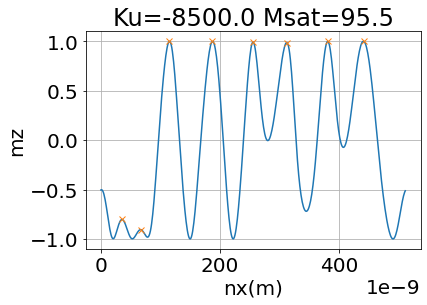

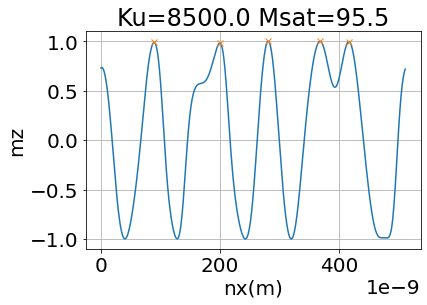

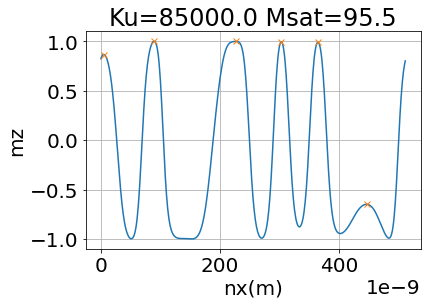

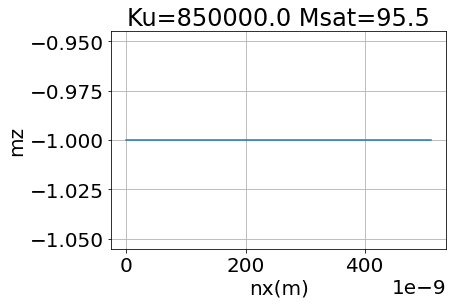

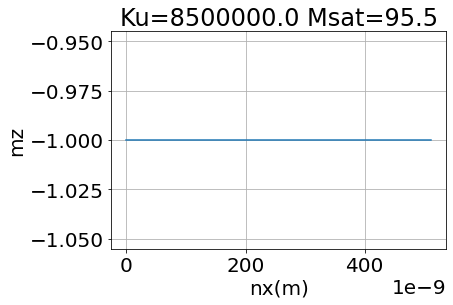

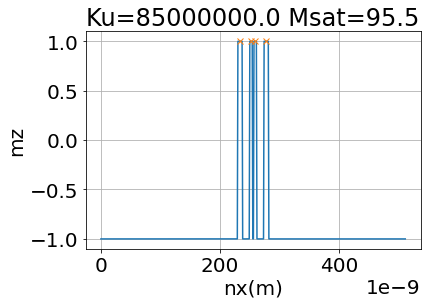

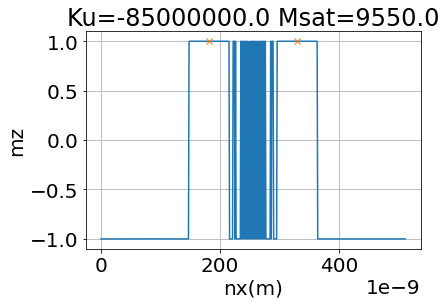

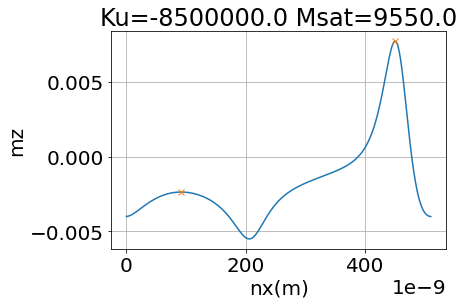

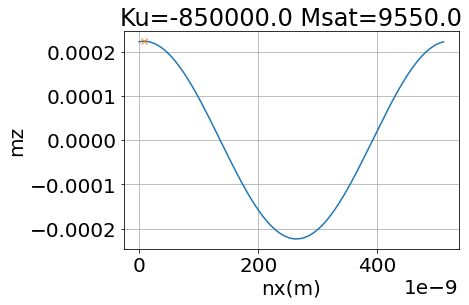

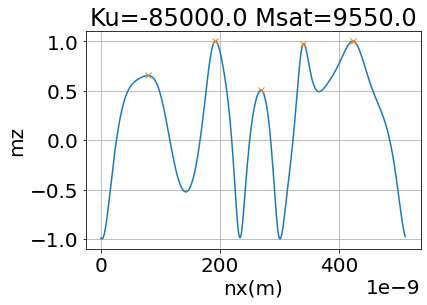

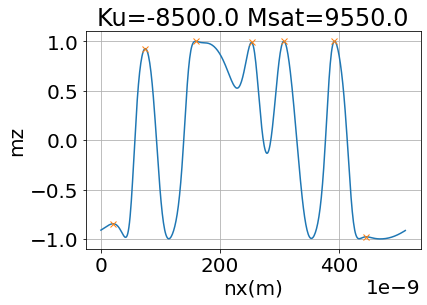

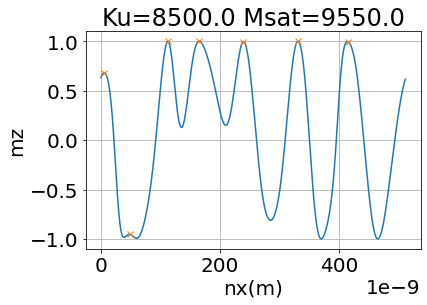

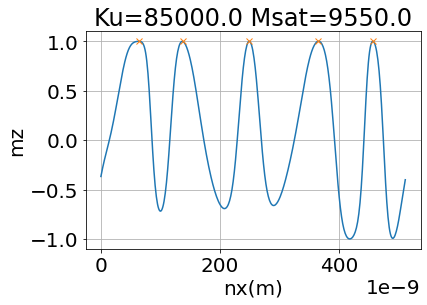

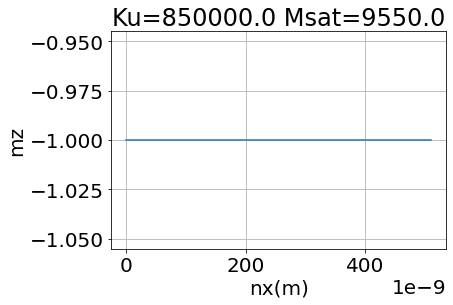

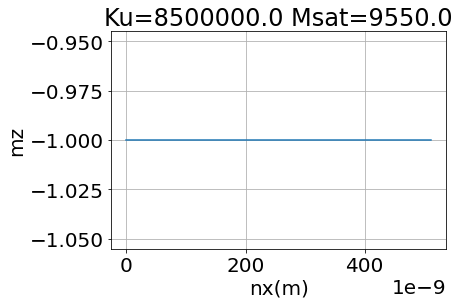

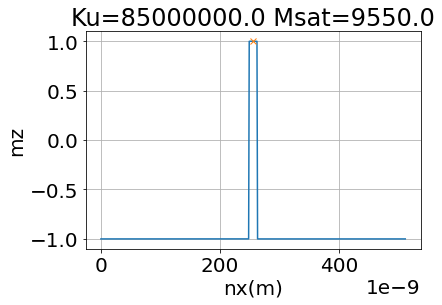

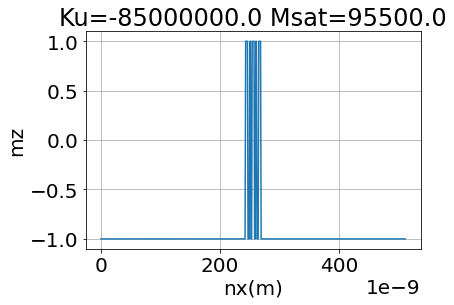

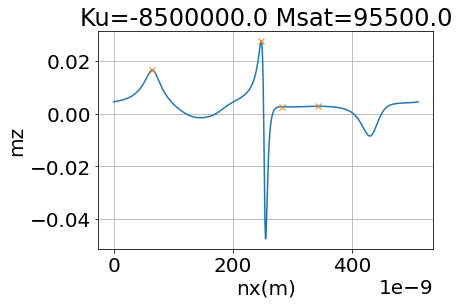

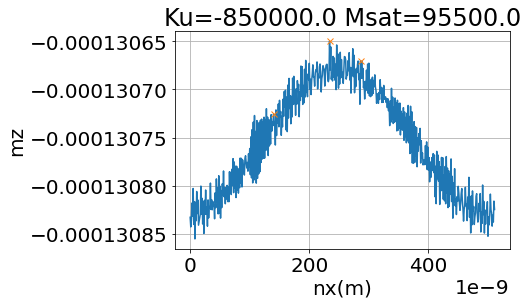

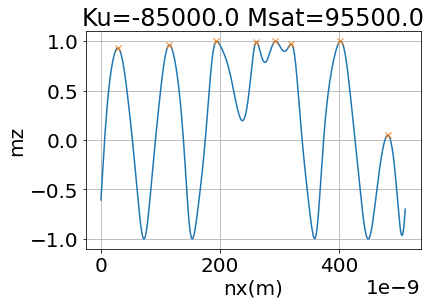

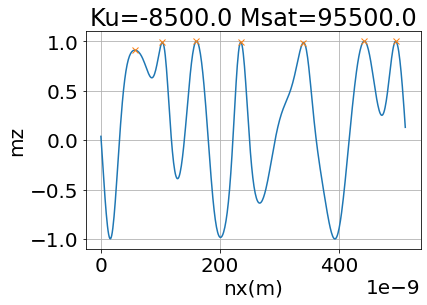

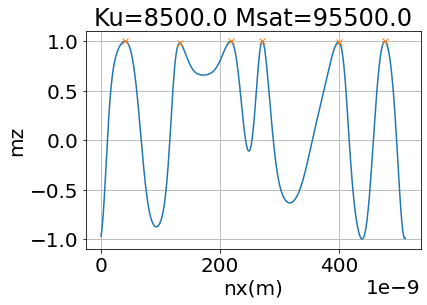

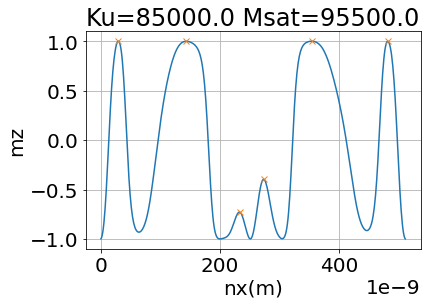

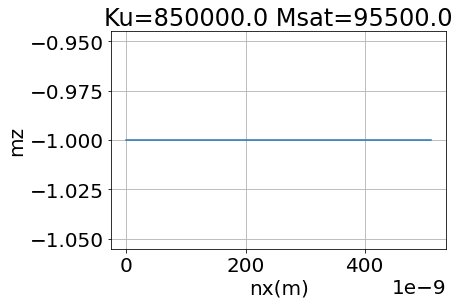

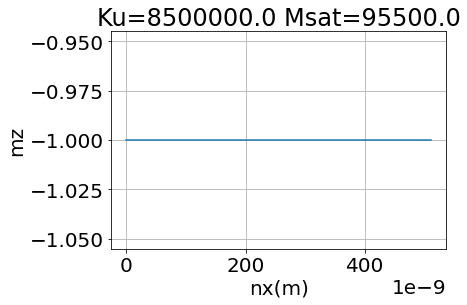

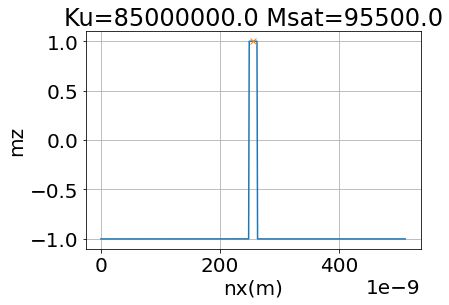

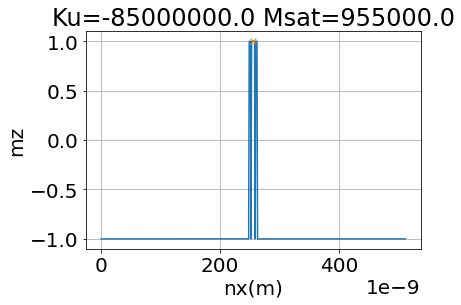

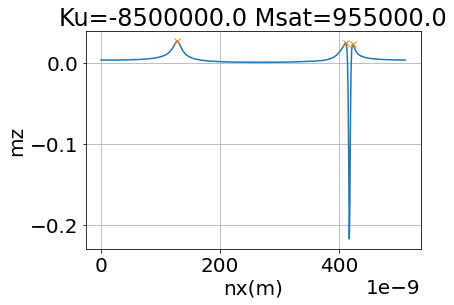

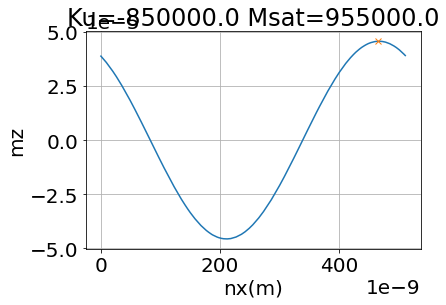

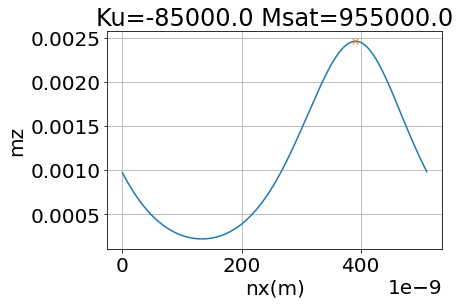

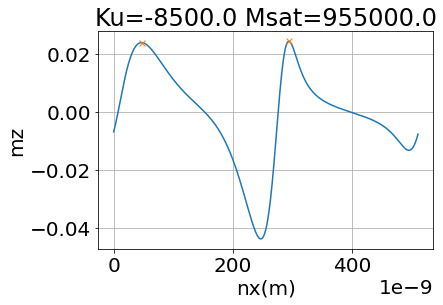

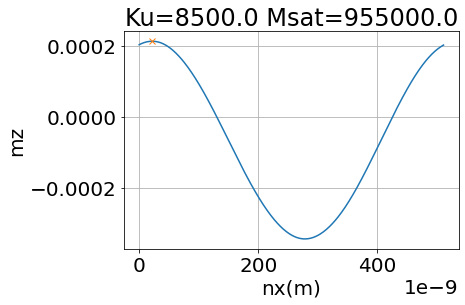

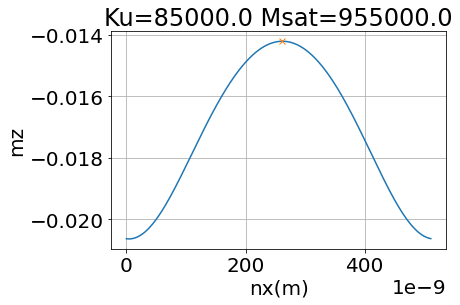

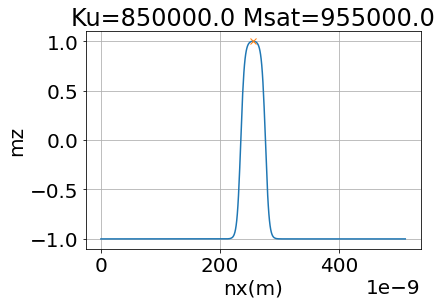

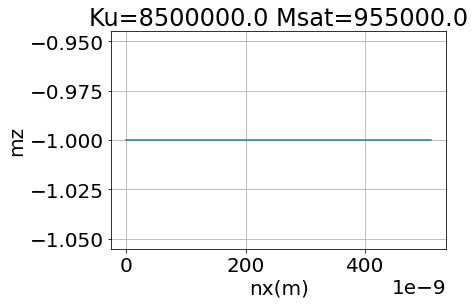

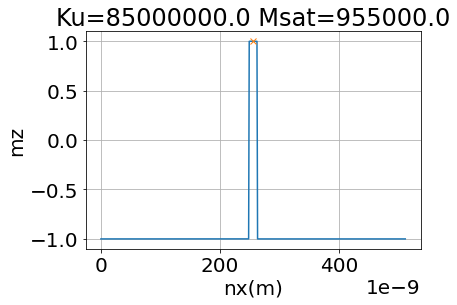

In [135]:
# loop through the directory of Ms and Ku sweeps, folders and files

# specify the values for which we want to generate the scripts
#Msat_values = [1e3*i for i in range(400,1300,50)]
#Ku_values = [1e4*i for i in range(70,125,5)]
#Msat_values = [1e3*i for i in range(350,1400,50)] #sweep3
#Ku_values = [1e4*i for i in range(55,160,5)]
#Msat_values = [1e3*i for i in range(100,1500,50)]
Msat_values = [ 955e-3, 955e-2, 955e-1 ,955e1, 955e2, 955e3 ]
Ku_values = [-85e6, -85e5, -85e4, -85e3, -85e2, 85e2, 85e3, 85e4, 85e5, 85e6 ] #sweep4

results6 = []
for Msat in Msat_values:
    for Ku in Ku_values:
        #read a single ovf file produced after minimization 
        ovffilePath = "MsKu_sweeps_p5/Ms_%02d/Ku_%g.out"%(Msat, Ku)
        if os.path.exists(ovffilePath):
            table, fields = read_ovf_out(ovffilePath)
            # Stack all snapshots of the magnetization on top of each other
            m = np.stack([fields[key] for key in sorted(fields.keys())])
            ny = m.shape[3]
            cx = 1e-9 # cell size 
            # Select the z component i = 2 acrross ny//2 at one z-layer
            mz = m[:,2,1,ny//2,:].T #transpose the mz array, m[time,m_component,z_grid,y_grid,x_grid]
            #check if there is one peak (skyrmion) or more(domain strips)
            #peaks, _ = find_peaks(mz.flatten(), width = (5,None))
            peaks = plotpeaks(mz,Ku,Msat,'Ku','Msat')
            Edt = table['Edens_total'][0]
            Edex = table['Edens_exch'][0]
            Eddem = table['Edens_demag'][0]
            Q = table['ext_topologicalcharge'][0]
            if (peaks.shape[0]>2 or peaks.shape[0]==0):
                print('at '+ovffilePath+' no skyrmion')
                results6.append( (Msat,Ku,np.nan,Edt,Edex,Eddem,Q) )
            else:
                # read the data between skyrmion edges at mz=0 to determine the diameter
                sky = np.where(mz>-0.25)[0]
                r = (sky.shape[0]*cx)/2 #get the radius of skyrmion
                results6.append( (Msat,Ku,r,Edt,Edex,Eddem,Q) )
                
        else:
            print('no directory found')
                
Msat6,Ku6,r6,Edt,Edex,Eddem,Q = zip(*results6)
        

In [43]:
target=np.intersect1d(np.where(np.array(Msat1) == 1350e3), np.where((np.array(Ku1)>=140e4) * (np.array(Ku1)<=140e4)))

In [44]:
r1 = np.asarray(r1)

In [45]:
r1[target] = 1.3450000000000002e-07

In [55]:
max(r1)

2.2900000000000003e-07

In [21]:
ovffilePath

'MsKu_sweeps_p2/Ms_100000/Ku_900000.out'

### Create a heatmap for skyrmion radius post-minimization

In [46]:
r6_hm = np.asarray(r6).reshape(len(Msat_values),len(Ku_values))

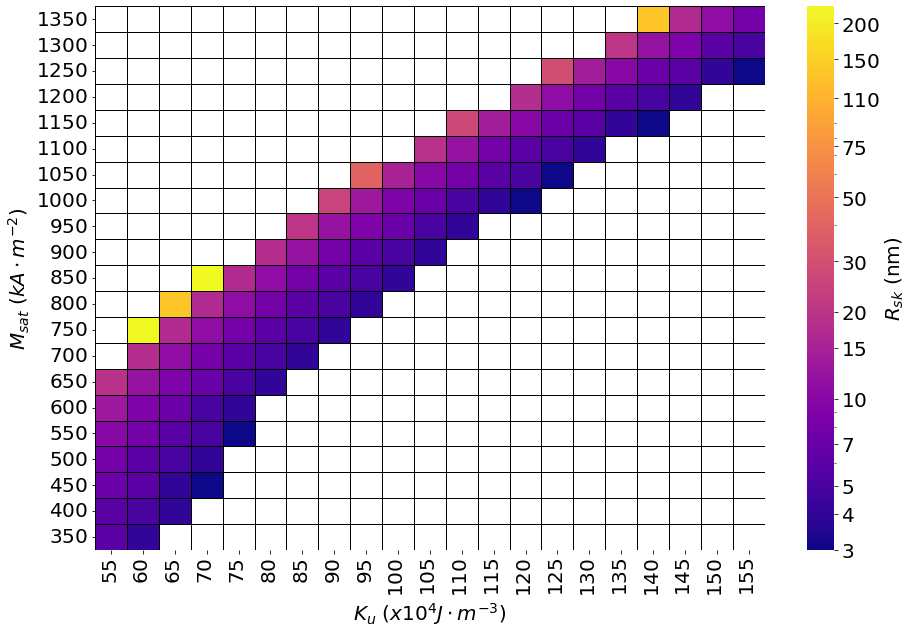

In [133]:
fig, ax = plt.subplots(figsize=(15,10))

# tick = ticker.ScalarFormatter(useOffset=False, useMathText=True)
# tick.set_powerlimits((5,5))
# tx = [u"${}$".format(tick.format_data(x)) for x in Ku_values]
# ty = [u"${}$".format(tick.format_data(x)) for x in Msat_values]

cbar_ticks = [ 3, 4, 5, 7, 10, 15, 20, 30, 50, 75, 110, 150, 200, 230]
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)

ax = sb.heatmap(r6_hm/1e-9, xticklabels = Ku_values, yticklabels = Msat_values, 
                cmap = 'plasma', 
                #vmin = -60e-9/1e-9, vmax = 300-9/1e-9, #square = True,
                linewidth=1, linecolor='black', norm=LogNorm(), 
                cbar_kws={'label': '$R_{sk}$ (nm)',
                          #"ticks": cbar_ticks, "format": formatter, 
                          'ticks':ticker.MaxNLocator(nbins=20),
                         })

#plt.title("Neel skyrmion radius (after relaxation)")
plt.xlabel('$K_u$ ($x10^4J\cdot m^{-3}$)')
plt.ylabel('$M_{sat}$ ($ kA\cdot m^{-2}$)')
plt.rcParams.update({'font.size': 20})
ax.set_yticklabels(["$%.0f$" % (y/1000) for y in Msat_values]);
ax.set_xticklabels(["$%.0f$" % (x/10000) for x in Ku_values]);

ax.invert_yaxis()
plt.show()



#min of r =3.0000000000000004e-09, Max of r=2.295e-07 nm

In [12]:
arr = np.sort(r1)

In [14]:
r1_hm.max()

2.56e-07

In [52]:
r1_hm[:,6]

array([8.000e-09, 8.000e-09, 9.000e-09, 9.000e-09, 9.000e-09, 1.000e-08,
       1.000e-08, 1.000e-08, 1.100e-08, 1.100e-08, 1.200e-08, 1.200e-08,
       1.300e-08, 1.300e-08, 1.400e-08, 1.500e-08, 1.500e-08, 1.600e-08,
       1.700e-08, 1.900e-08, 2.000e-08, 2.200e-08, 2.500e-08, 2.900e-08,
       3.500e-08, 5.300e-08, 2.295e-07, 0.000e+00, 0.000e+00])

In [48]:
np.savetxt("MsVsRsk.csv", r1_hm[:,6], delimiter=",")

### Create Energies and topological charge heatmaps

In [35]:
Edt_hm = np.asarray(Edt).reshape(len(Msat_values),len(Ku_values))

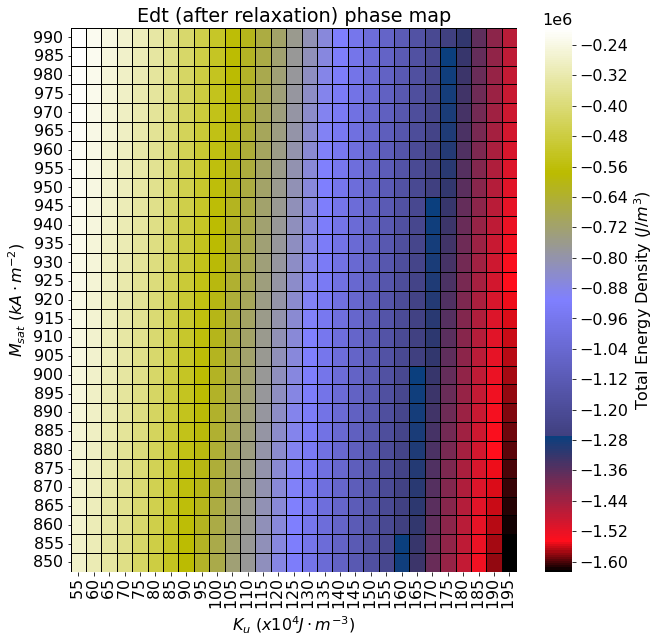

In [42]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sb.heatmap(Edt_hm, xticklabels = Ku_values, yticklabels = Msat_values, 
                cmap = 'gist_stern', #vmin = 1.0e-09, vmax = 2.295e-07, #square = True,
                linewidth=1, linecolor='Black',
                cbar_kws={'label': 'Total Energy Density $(J/m^3)$','ticks':ticker.MaxNLocator(nbins=20),
                         #'format': '%2.2e'
                         })
plt.title("Edt (after relaxation) phase map")
plt.xlabel('$K_u$ ($x10^4J\cdot m^{-3}$)')
plt.ylabel('$M_{sat}$ ($ kA\cdot m^{-2}$)')
plt.rcParams.update({'font.size': 14})
ax.set_yticklabels(["$%.0f$" % (y/1000) for y in Msat_values]);
ax.set_xticklabels(["$%.0f$" % (x/10000) for x in Ku_values]);

ax.invert_yaxis()
plt.show()


In [43]:
Edex_hm = np.asarray(Edex).reshape(len(Msat_values),len(Ku_values))

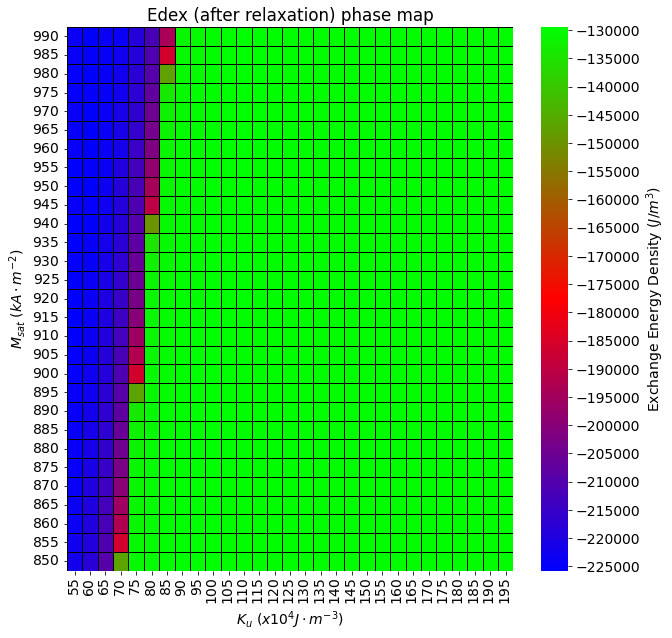

In [46]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sb.heatmap(Edex_hm, xticklabels = Ku_values, yticklabels = Msat_values, 
                cmap = 'brg', #vmin = 1.0e-09, vmax = 2.295e-07, #square = True,
                linewidth=1, linecolor='Black',
                cbar_kws={'label': 'Exchange Energy Density $(J/m^3)$','ticks':ticker.MaxNLocator(nbins=20),
                         #'format': '%2.2e'
                         })
plt.title("Edex (after relaxation) phase map")
plt.xlabel('$K_u$ ($x10^4J\cdot m^{-3}$)')
plt.ylabel('$M_{sat}$ ($ kA\cdot m^{-2}$)')
plt.rcParams.update({'font.size': 14})
ax.set_yticklabels(["$%.0f$" % (y/1000) for y in Msat_values]);
ax.set_xticklabels(["$%.0f$" % (x/10000) for x in Ku_values]);

ax.invert_yaxis()
plt.show()


In [47]:
Eddem_hm = np.asarray(Eddem).reshape(len(Msat_values),len(Ku_values))

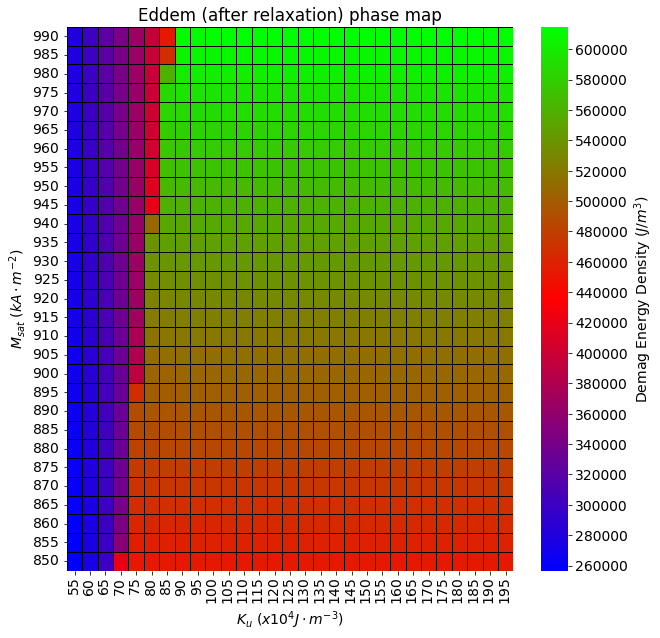

In [48]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sb.heatmap(Eddem_hm, xticklabels = Ku_values, yticklabels = Msat_values, 
                cmap = 'brg', #vmin = 1.0e-09, vmax = 2.295e-07, #square = True,
                linewidth=1, linecolor='Black',
                cbar_kws={'label': 'Demag Energy Density $(J/m^3)$','ticks':ticker.MaxNLocator(nbins=20),
                         #'format': '%2.2e'
                         })
plt.title("Eddem (after relaxation) phase map")
plt.xlabel('$K_u$ ($x10^4J\cdot m^{-3}$)')
plt.ylabel('$M_{sat}$ ($ kA\cdot m^{-2}$)')
plt.rcParams.update({'font.size': 14})
ax.set_yticklabels(["$%.0f$" % (y/1000) for y in Msat_values]);
ax.set_xticklabels(["$%.0f$" % (x/10000) for x in Ku_values]);

ax.invert_yaxis()
plt.show()


In [49]:
Q_hm = np.asarray(Q).reshape(len(Msat_values),len(Ku_values))

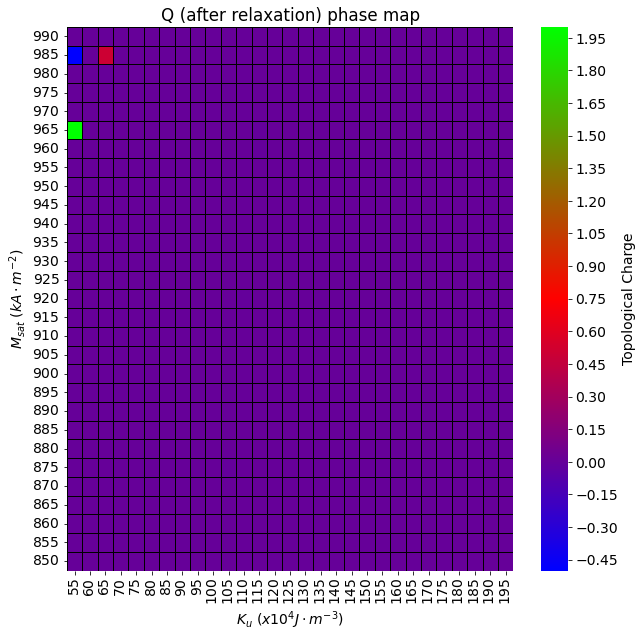

In [50]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sb.heatmap(Q_hm, xticklabels = Ku_values, yticklabels = Msat_values, 
                cmap = 'brg', #vmin = 1.0e-09, vmax = 2.295e-07, #square = True,
                linewidth=1, linecolor='Black',
                cbar_kws={'label': 'Topological Charge','ticks':ticker.MaxNLocator(nbins=20),
                         #'format': '%2.2e'
                         })
plt.title("Q (after relaxation) phase map")
plt.xlabel('$K_u$ ($x10^4J\cdot m^{-3}$)')
plt.ylabel('$M_{sat}$ ($ kA\cdot m^{-2}$)')
plt.rcParams.update({'font.size': 14})
ax.set_yticklabels(["$%.0f$" % (y/1000) for y in Msat_values]);
ax.set_xticklabels(["$%.0f$" % (x/10000) for x in Ku_values]);

ax.invert_yaxis()
plt.show()


# Testing Spot

3.25e-09
[396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593
 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611
 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626]


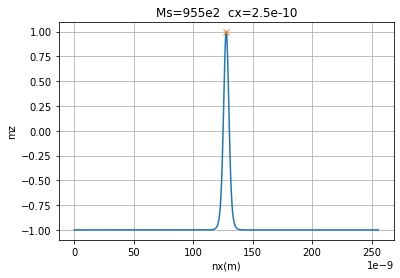

In [30]:
table, fields = read_ovf_out('Testingsmallcellsize_Ms955e2_Bext3000mT.out')
# Stack all snapshots of the magnetization on top of each other
m0 = np.stack([fields[key] for key in sorted(fields.keys())])
ny = m0.shape[3]
cx = 0.25e-9 # cell size 
# Select the z component i = 2 acrross ny//2 at one z-layer
mz0 = m0[:,2,1,ny//2,:].T #transpose the mz array, m[time,m_component,z_grid,y_grid,x_grid]
#check if there is one peak (skyrmion) or more(domain strips)
#peaks = find_peaks(mz0.flatten(),height = 9e-6, width = (5,None))
peaks = plotpeaks(mz0,'955e2 ',cx,'Ms','cx')
sky = np.where(mz0>-0.25)[0]
print((sky.shape[0]*cx)/2)
DW = np.where(mz0>-1.0)[0]
# w = ((DW - sky.shape[0])*cx)/2  #get DW width
print(DW)

In [31]:
sky = np.where(mz0>-0.25)[0]
print(sky)
DW = np.where(mz0>-0.75)[0]
print(DW)
w = ((DW.shape[0] - sky.shape[0])*cx)/2  #get DW width
print('w=',w,',','r=',(sky.shape[0]*cx)/2) #get the radius of skyrmion)

[499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516
 517 518 519 520 521 522 523 524]
[492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509
 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527
 528 529 530 531]
w= 1.7500000000000002e-09 , r= 3.25e-09


# b- Jint and Ku sweeps

In [78]:
# loop through the directory of Jint and Ku sweeps, folders and files

# specify the values for which we want to generate the scripts
Jint_values = [-5e-5, -13e-5, -26e-5, -46e-5, -76e-5, -100e-5, -200e-5] #-0.13e-3 J/m2
Ku_values = [1e4*i for i in range(55,200,5)]

results2 = []
for Jint in Jint_values:
    
    for Ku in Ku_values:
        #read a single ovf file produced after minimization 
        ovffilePath = "JintKu_sweeps/Jint_%s/Ku_%g.out"%(str(-1*Jint).replace('.','_'), Ku)
        if os.path.exists(ovffilePath):
            table, fields = read_ovf_out(ovffilePath)
            # Stack all snapshots of the magnetization on top of each other
            m = np.stack([fields[key] for key in sorted(fields.keys())])
            ny = m.shape[3]
            cx = 1e-9 # cell size 
            # Select the z component i = 2 acrross ny//2 at one z-layer
            mz = m[:,2,1,ny//2,:].T #transpose the mz array, m[time,m_component,z_grid,y_grid,x_grid]
            #check if there is one peak (skyrmion) or more(domain strips)
            peaks, _ = find_peaks(mz.flatten(), width = (5,None))
            #peaks = plotpeaks(mz,Ku,Jint,'Ku','Jint')
            Edt = table['Edens_total'][0]
            Edex = table['Edens_exch'][0]
            Eddem = table['Edens_demag'][0]
            if (peaks.shape[0]>2 or peaks.shape[0]==0):
                print('at '+ovffilePath+' no skyrmion')
                results2.append( (Jint,Ku,0,Edt,Edex,Eddem) )
            else:
                # read the data between skyrmion edges at mz=0 to determine the diameter
                sky = np.where(mz>-0.25)[0]
                r = (sky.shape[0]*cx)/2 #get the radius of skyrmion
                results2.append( (Jint,Ku,r,Edt,Edex,Eddem) )
        else:
            print('no directory found')
                
Jint2,Ku2,r2,Edt,Edex,Eddem = zip(*results2)

at JintKu_sweeps/Jint_5e-05/Ku_550000.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_600000.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_650000.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_700000.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_750000.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_800000.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_1.15e+06.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_1.2e+06.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_1.25e+06.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_1.3e+06.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_1.35e+06.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_1.4e+06.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_1.45e+06.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_1.5e+06.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_1.55e+06.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_1.6e+06.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_1.65e+06.out no skyrmion
at JintKu_sweeps/Jint_5e-05/Ku_1.7e+06.out no skyrmion
at JintKu_

at JintKu_sweeps/Jint_0_002/Ku_1.4e+06.out no skyrmion
at JintKu_sweeps/Jint_0_002/Ku_1.45e+06.out no skyrmion
at JintKu_sweeps/Jint_0_002/Ku_1.5e+06.out no skyrmion
at JintKu_sweeps/Jint_0_002/Ku_1.55e+06.out no skyrmion
at JintKu_sweeps/Jint_0_002/Ku_1.6e+06.out no skyrmion
at JintKu_sweeps/Jint_0_002/Ku_1.65e+06.out no skyrmion
at JintKu_sweeps/Jint_0_002/Ku_1.7e+06.out no skyrmion
at JintKu_sweeps/Jint_0_002/Ku_1.75e+06.out no skyrmion
at JintKu_sweeps/Jint_0_002/Ku_1.8e+06.out no skyrmion
at JintKu_sweeps/Jint_0_002/Ku_1.85e+06.out no skyrmion
at JintKu_sweeps/Jint_0_002/Ku_1.9e+06.out no skyrmion
at JintKu_sweeps/Jint_0_002/Ku_1.95e+06.out no skyrmion


### Create a heatmap for skyrmion radius post-minimization

In [79]:
r2_hm = np.asarray(r2).reshape(len(Jint_values),len(Ku_values))

In [80]:
r2_hm

array([[0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 2.2e-08,
        1.3e-08, 9.0e-09, 7.0e-09, 5.0e-09, 4.0e-09, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 2.2e-08,
        1.3e-08, 9.0e-09, 7.0e-09, 5.0e-09, 4.0e-09, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 2.2e-08,
        1.3e-08, 9.0e-09, 7.0e-09, 5.0e-09, 4.0e-09, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 2.2e-08,
        1.3e-08, 9.0e-0

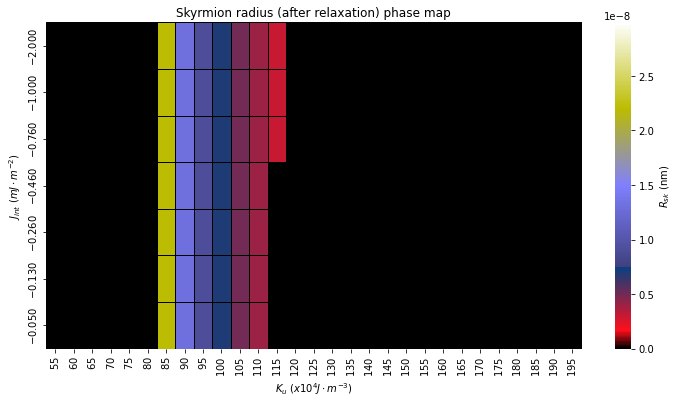

In [81]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sb.heatmap(r2_hm, xticklabels = Ku_values, yticklabels = Jint_values, 
                cmap = 'gist_stern', vmin = 0, vmax = 2.99e-8, #square = True,
                linewidth=1, linecolor='black',
                cbar_kws={'label': '$R_{sk}$ (nm)'})
plt.title("Skyrmion radius (after relaxation) phase map")
plt.xlabel('$K_u$ ($x10^4 J\cdot m^{-3}$)')
plt.ylabel('$J_{int}$ ($mJ\cdot m^{-2}$)')
plt.rcParams.update({'font.size': 16})
ax.set_yticklabels(["$%.3f$" % (y*1000) for y in Jint_values]);
ax.set_xticklabels(["$%.0f$" % (x/10000) for x in Ku_values]);
#ax.ticklabel_format(axis='x', style = 'sci', scilimits=(4,4))

ax.invert_yaxis()

# min r= 3.0000000000000004e-09 , max r = 2.2000000000000002e-08

In [82]:
r2_hm[0,:]

array([0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 2.2e-08,
       1.3e-08, 9.0e-09, 7.0e-09, 5.0e-09, 4.0e-09, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00])

In [91]:
for i in np.arange(len(Jint_values)):
    np.savetxt("RVsK_Jint_"+str(Jint_values[i])+".csv", r2_hm[i,:], delimiter=",")

In [92]:
np.savetxt("Ku.csv", Ku_values, delimiter=",")

### Create Energies and topological charge heatmaps

In [15]:
Edt_hm = np.asarray(Edt).reshape(len(Jint_values),len(Ku_values))

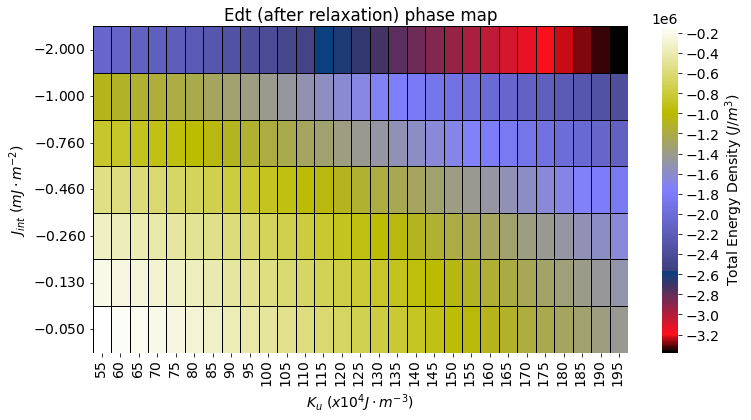

In [20]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sb.heatmap(Edt_hm, xticklabels = Ku_values, yticklabels = Jint_values, 
                cmap = 'gist_stern', #vmin = 1.0e-09, vmax = 2.295e-07, #square = True,
                linewidth=1, linecolor='Black',
                cbar_kws={'label': 'Total Energy Density $(J/m^3)$','ticks':ticker.MaxNLocator(nbins=20),
                         #'format': '%2.2e'
                         })
plt.title("Edt (after relaxation) phase map")
plt.xlabel('$K_u$ ($x10^4J\cdot m^{-3}$)')
plt.ylabel('$J_{int}$ ($mJ\cdot m^{-2}$)')
plt.rcParams.update({'font.size': 14})
ax.set_yticklabels(["$%.3f$" % (y*1000) for y in Jint_values]);
ax.set_xticklabels(["$%.0f$" % (x/10000) for x in Ku_values]);

ax.invert_yaxis()
plt.show()


In [22]:
Edex_hm = np.asarray(Edex).reshape(len(Jint_values),len(Ku_values))

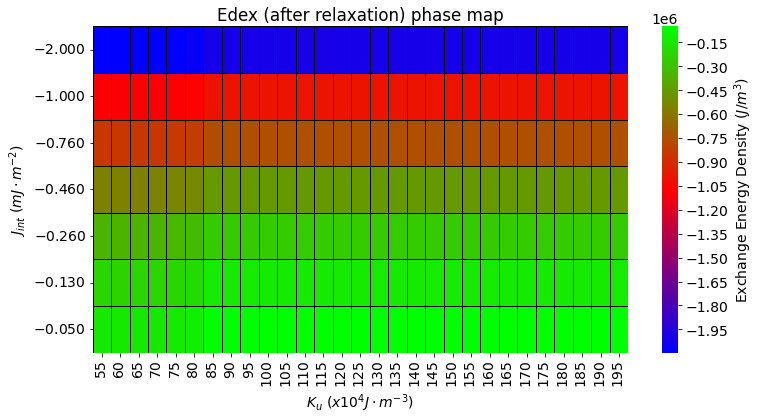

In [23]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sb.heatmap(Edex_hm, xticklabels = Ku_values, yticklabels = Jint_values, 
                cmap = 'brg', #vmin = 1.0e-09, vmax = 2.295e-07, #square = True,
                linewidth=1, linecolor='Black',
                cbar_kws={'label': 'Exchange Energy Density $(J/m^3)$','ticks':ticker.MaxNLocator(nbins=20),
                         #'format': '%2.2e'
                         })
plt.title("Edex (after relaxation) phase map")
plt.xlabel('$K_u$ ($x10^4J\cdot m^{-3}$)')
plt.ylabel('$J_{int}$ ($mJ\cdot m^{-2}$)')
plt.rcParams.update({'font.size': 14})
ax.set_yticklabels(["$%.3f$" % (y*1000) for y in Jint_values]);
ax.set_xticklabels(["$%.0f$" % (x/10000) for x in Ku_values]);

ax.invert_yaxis()
plt.show()


In [24]:
Eddem_hm = np.asarray(Eddem).reshape(len(Jint_values),len(Ku_values))

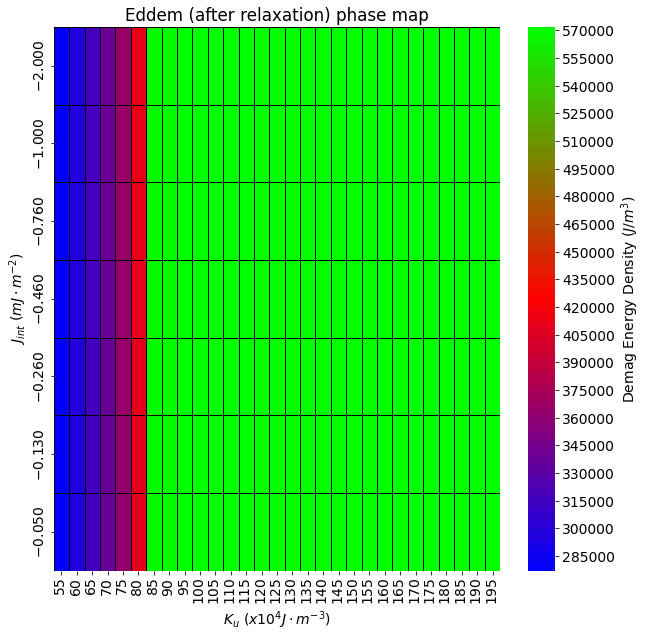

In [25]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sb.heatmap(Eddem_hm, xticklabels = Ku_values, yticklabels = Jint_values, 
                cmap = 'brg', #vmin = 1.0e-09, vmax = 2.295e-07, #square = True,
                linewidth=1, linecolor='Black',
                cbar_kws={'label': 'Demag Energy Density $(J/m^3)$','ticks':ticker.MaxNLocator(nbins=20),
                         #'format': '%2.2e'
                         })
plt.title("Eddem (after relaxation) phase map")
plt.xlabel('$K_u$ ($x10^4J\cdot m^{-3}$)')
plt.ylabel('$J_{int}$ ($mJ\cdot m^{-2}$)')
plt.rcParams.update({'font.size': 14})
ax.set_yticklabels(["$%.3f$" % (y*1000) for y in Jint_values]);
ax.set_xticklabels(["$%.0f$" % (x/10000) for x in Ku_values]);

ax.invert_yaxis()
plt.show()


## c- iDMI and Ku sweeps

In [62]:
# loop through the directory of Dind and Ku sweeps, folders and files

# specify the values for which we want to generate the scripts
#Dind_values = [1e-4*i for i in range(10,60,5)] #2.0e-3 J/m3 for now 
#Ku_values = [1e4*i for i in range(65,250,10)] 
Ku_values = [1e4*i for i in range(70,205,5)]
Dind_values = [1e-4*i for i in range(10,50,5)]

results3 = []
for Dind in Dind_values:
    for Ku in Ku_values:
        #read a single ovf file produced after minimization 
        ovffilePath = "DindKu_sweeps/Dind_%s/Ku_%g.out"%(str(1*Dind).replace('.','_'), Ku)
        if os.path.exists(ovffilePath):
            table, fields = read_ovf_out(ovffilePath)
            # Stack all snapshots of the magnetization on top of each other
            m = np.stack([fields[key] for key in sorted(fields.keys())])
            ny = m.shape[3]
            cx = 1e-9 # cell size 
            # Select the z component i = 2 acrross ny//2 at one z-layer
            mz = m[:,2,1,ny//2,:].T #transpose the mz array, m[time,m_component,z_grid,y_grid,x_grid]
            Edt = table['Edens_total'][0]
            Edex = table['Edens_exch'][0]
            Eddem = table['Edens_demag'][0]
            #check if there is one peak (skyrmion) or more(domain strips)
            peaks, _ = find_peaks(mz.flatten(), width = (5,None))
            #peaks = plotpeaks(mz,Ku,Dind,'Ku','Dind')
            if (peaks.shape[0]>2 or peaks.shape[0]==0):
                print('at '+ovffilePath+' no skyrmion')
                results3.append( (Dind,Ku,np.nan,Edt,Edex,Eddem) )
            else:
                # read the data between skyrmion edges at mz=0 to determine the diameter
                sky = np.where(mz>-0.25)[0]
                r = (sky.shape[0]*cx)/2 #get the radius of skyrmion
                results3.append( (Dind,Ku,r,Edt,Edex,Eddem) )
                
        else:
            print('no directory found')
                
Dind1,Ku3,r3,Edt,Edex,Eddem = zip(*results3)

at DindKu_sweeps/Dind_0_001/Ku_800000.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_850000.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_900000.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_950000.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_1e+06.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_1.05e+06.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_1.1e+06.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_1.15e+06.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_1.2e+06.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_1.25e+06.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_1.3e+06.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_1.35e+06.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_1.4e+06.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_1.45e+06.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_1.5e+06.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_1.55e+06.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_1.6e+06.out no skyrmion
at DindKu_sweeps/Dind_0_001/Ku_1.65e+06.out no skyrmion
at DindKu

at DindKu_sweeps/Dind_0_0045000000000000005/Ku_1.4e+06.out no skyrmion
at DindKu_sweeps/Dind_0_0045000000000000005/Ku_1.45e+06.out no skyrmion
at DindKu_sweeps/Dind_0_0045000000000000005/Ku_1.5e+06.out no skyrmion
at DindKu_sweeps/Dind_0_0045000000000000005/Ku_1.55e+06.out no skyrmion
at DindKu_sweeps/Dind_0_0045000000000000005/Ku_1.6e+06.out no skyrmion
at DindKu_sweeps/Dind_0_0045000000000000005/Ku_1.65e+06.out no skyrmion
at DindKu_sweeps/Dind_0_0045000000000000005/Ku_1.7e+06.out no skyrmion
at DindKu_sweeps/Dind_0_0045000000000000005/Ku_1.75e+06.out no skyrmion
at DindKu_sweeps/Dind_0_0045000000000000005/Ku_1.8e+06.out no skyrmion


In [10]:
results3


[(0.0005, 550000.0, 2.28e-07, -129420.484, -131309.67, 53352.76),
 (0.0005, 650000.0, nan, -208074.19, -130000, 571925.2),
 (0.0005, 750000.0, nan, -308074.4, -130000, 571925.2),
 (0.0005, 850000.0, nan, -408074.78, -130000, 571925.2),
 (0.0005, 950000.0, nan, -508075.03, -130000, 571925.2),
 (0.0005, 1050000.0, nan, -608074.56, -130000, 571925.2),
 (0.0005, 1150000.0, nan, -708074.25, -130000, 571925.2),
 (0.0005, 1250000.0, nan, -808074, -130000, 571925.2),
 (0.0005, 1350000.0, nan, -908073.9, -130000, 571925.2),
 (0.0005, 1450000.0, nan, -1008073.56, -130000, 571925.2),
 (0.0005, 1550000.0, nan, -1108073.9, -130000, 571925.2),
 (0.0005, 1650000.0, nan, -1208074.4, -130000, 571925.2),
 (0.0005, 1750000.0, nan, -1308074.9, -130000, 571925.2),
 (0.0005, 1850000.0, nan, -1408075.1, -130000, 571925.2),
 (0.0005, 1950000.0, nan, -1508075.5, -130000, 571925.2),
 (0.0005, 2050000.0, nan, -1608075.9, -130000, 571925.2),
 (0.0005, 2150000.0, nan, -1708076.0, -130000, 571925.2),
 (0.0005, 2250

### Create a heatmap for skyrmion radius post-minimization

In [70]:
r3_hm = np.asarray(r3).reshape(len(Dind_values),len(Ku_values))

In [71]:
target=np.intersect1d(np.where(np.array(Dind1) == 40e-4), np.where((np.array(Ku3)>=155e4) * (np.array(Ku3)<=155e4)))

In [72]:
r3 = np.asarray(r3)

In [73]:
r3[target] = np.nan

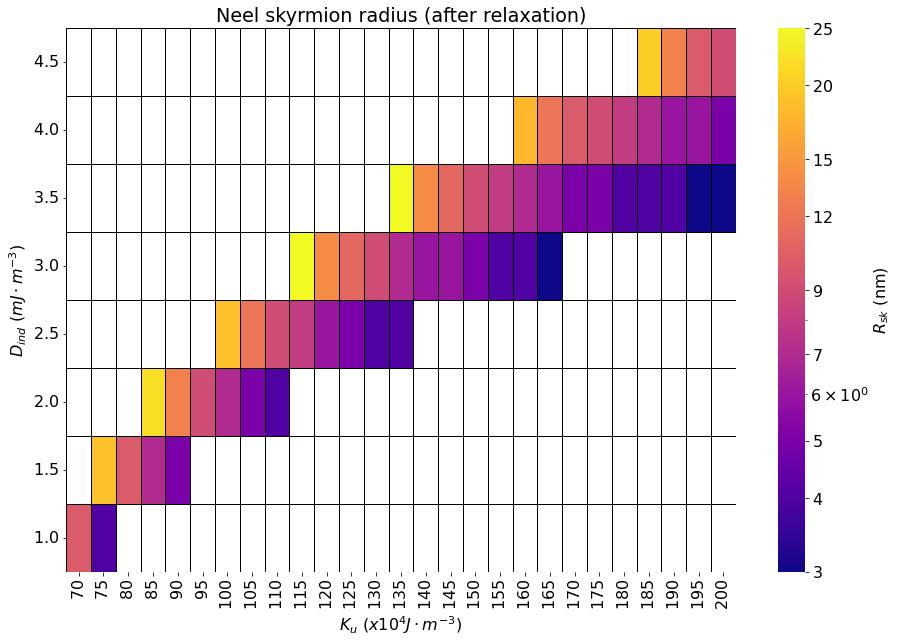

In [80]:
fig, ax = plt.subplots(figsize=(15,10))

# tick = ticker.ScalarFormatter(useOffset=False, useMathText=True)
# tick.set_powerlimits((5,5))
# tx = [u"${}$".format(tick.format_data(x)) for x in Ku_values]
# ty = [u"${}$".format(tick.format_data(x)) for x in Msat_values]

cbar_ticks = [ 3, 4, 5, 7, 9, 12, 15, 20, 25]
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)

ax = sb.heatmap(r3_hm/1e-9, xticklabels = Ku_values, yticklabels = Dind_values, 
                cmap = 'plasma', 
                #vmin = -60e-9/1e-9, vmax = 300-9/1e-9, 
                #square = True,
                linewidth=1, linecolor='black', norm=LogNorm(), 
                cbar_kws={'label': '$R_{sk}$ (nm)',
                          "ticks": cbar_ticks, "format": formatter, 
                          #'ticks':ticker.MaxNLocator(nbins=20),
                         })

plt.title("Neel skyrmion radius (after relaxation)")
plt.xlabel('$K_u$ ($x10^4J\cdot m^{-3}$)')
plt.ylabel('$D_{ind}$ ($ mJ\cdot m^{-3}$)')
plt.rcParams.update({'font.size': 16})
ax.set_yticklabels(["$%.1f$" % (y*1000) for y in Dind_values]);
ax.set_xticklabels(["$%.0f$" % (x/10000) for x in Ku_values]);

ax.invert_yaxis()
plt.show()



#min of r =3.0000000000000004e-09, Max of r= nm

In [59]:
r3_hm.max()

nan

In [50]:
r3_hm.min()

3.0000000000000004e-09

# e - Bz vs Jint

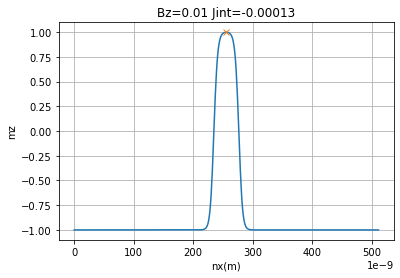

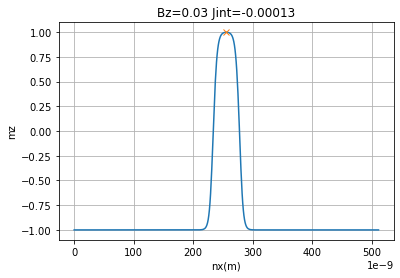

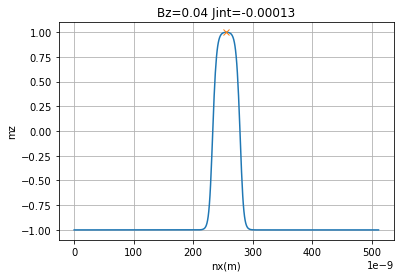

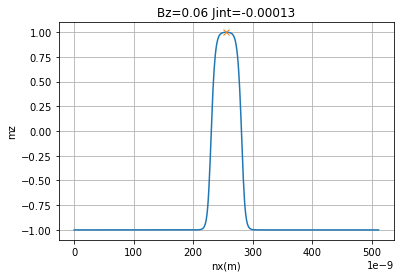

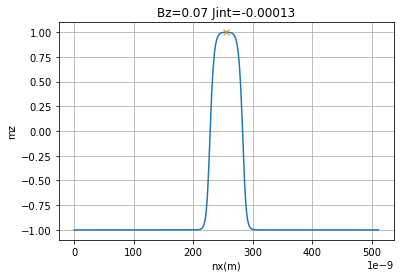

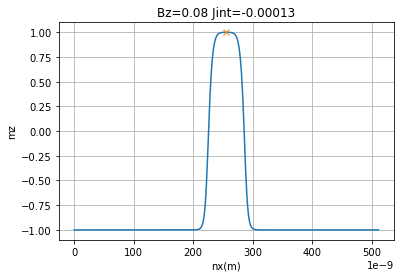

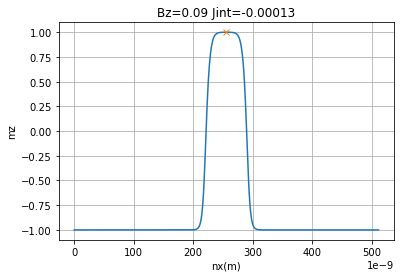

In [34]:
# loop through the directory of Jint and Ku sweeps, folders and files

# specify the values for which we want to generate the scripts
#Jint_values = [-1e-5, -5e-5, -13e-5, -26e-5, -46e-5, -76e-5, -100e-5, -150e-5, -200e-5] #-0.13e-3 J/m2
# #Bz_values = [ 20e-3, 50e-3, 100e-3, 300e-3, 500e-3, 1000e-3, 1200e-3, 1600e-3, 2000e-3, 2200e-3, 2600e-3, 3000e-3,
#             3500e-3, 4000e-3]
Bz_values = [10e-3, 30e-3, 40e-3, 60e-3, 70e-3, 80e-3, 90e-3]
Jint_values = [-13e-5]

results5 = []
for Jint in Jint_values:
    
    for Bz in Bz_values:
        #read a single ovf file produced after minimization 
        ovffilePath = "JintBz_sweeps_fig1d/Jint_%s/Bz_%g.out"%(str(-1*Jint).replace('.','_'), Bz)
        if os.path.exists(ovffilePath):
            table, fields = read_ovf_out(ovffilePath)
            # Stack all snapshots of the magnetization on top of each other
            m = np.stack([fields[key] for key in sorted(fields.keys())])
            ny = m.shape[3]
            cx = 1e-9 # cell size 
            # Select the z component i = 2 acrross ny//2 at single z-layer
            mz = m[:,2,1,ny//2,:].T #transpose the mz array, m[time,m_component,z_grid,y_grid,x_grid]
            #check if there is one peak (skyrmion) or more(domain strips)
            #peaks, _ = find_peaks(-mz.flatten(), width = (5,None))
            peaks = plotpeaks(mz,Bz,Jint,'Bz','Jint')
            Edt = table['Edens_total'][0]
            Edex = table['Edens_exch'][0]
            Eddem = table['Edens_demag'][0]
            if (peaks.shape[0]>2 or peaks.shape[0]==0 ):
                print('at '+ovffilePath+' no skyrmion')
                results5.append( (Jint,Bz,0,Edt,Edex,Eddem) )
            else:
                # read the data between skyrmion edges at mz=0 to determine the diameter
                sky = np.where(mz>-0.25)[0]
                r = (sky.shape[0]*cx)/2 #get the radius of skyrmion
                results5.append( (Jint,Bz,r,Edt,Edex,Eddem) )
        else:
            print('no directory found')
                
Jint5,Bz,r5,Edt,Edex,Eddem = zip(*results5)

### Create a heatmap for skyrmion radius post-minimization

In [35]:
r5_hm_top = np.asarray(r5).reshape(len(Jint_values),len(Bz_values))

In [31]:
r5_hm_bottom = np.asarray(r5).reshape(len(Jint_values),len(Bz_values))

In [15]:
Bz_values

[0.01, 0.03, 0.04, 0.06, 0.07, 0.08, 0.09]

In [32]:
r5_hm_bottom

array([[2.2e-08, 2.2e-08, 2.3e-08, 2.4e-08, 2.5e-08, 2.7e-08, 3.0e-08]])

In [36]:
r5_hm_top

array([[2.2e-08, 2.4e-08, 2.4e-08, 2.7e-08, 2.9e-08, 3.1e-08, 3.6e-08]])

In [71]:
r5_hm_top.max()

1.0300000000000001e-07

In [65]:
r5_hm_bottom[5,3] = 8.05e-08

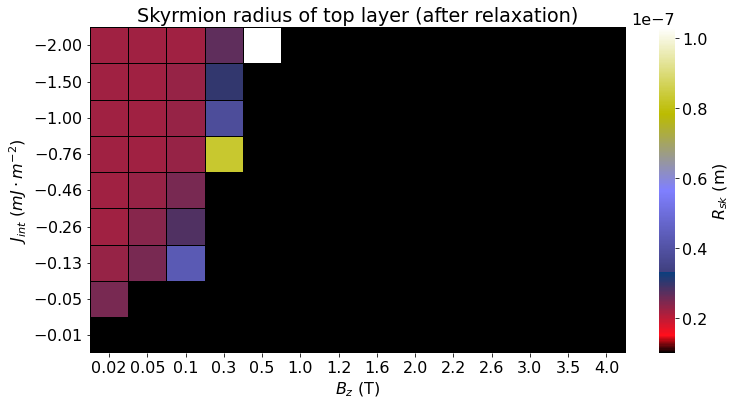

In [74]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sb.heatmap(r5_hm_top, xticklabels = Bz_values, yticklabels = Jint_values, 
                cmap = 'gist_stern', vmin = 0.1e-7, vmax = 1.0300000000000001e-07, #square = True,
                linewidth=1, linecolor='black',
                cbar_kws={'label': '$R_{sk}$ (m)'})
plt.title("Skyrmion radius of top layer (after relaxation)")
plt.xlabel('$B_z$ (T)')
plt.ylabel('$J_{int}$ ($mJ\cdot m^{-2}$)')
plt.rcParams.update({'font.size': 16})
ax.set_yticklabels(["$%.2f$" % (y*1000) for y in Jint_values]);
#ax.set_xticklabels(["$%.0f$" % (x/10000) for x in Ku_values]);
#ax.ticklabel_format(axis='x', style = 'sci', scilimits=(4,4))
# cb = fig.axes[-1]
# ticks = [20, 40, 60, 80,100, 120, 140]
# cb.yaxis.set_ticks(ticks, labels=["$%.0f$" % (t/1e-9) for t in ticks])
ax.invert_yaxis()

# min r= 3.0000000000000004e-09 , max r = 2.2000000000000002e-08

In [75]:
r5_hm_top[2,:] #pick Jint=-0.00013

array([2.3e-08, 2.5e-08, 4.3e-08, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00])

In [21]:
np.savetxt("RsTopVsBz.csv", r5_hm_top[2,:], delimiter=",")

AttributeError: 'AxesSubplot' object has no attribute 'ticks'